In [1]:
import pandas as pd
import numpy as np

import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<h3>Data Preparation</h3>

In [3]:
df= pd.read_csv('MobilePhonedata_new.csv')
df.head()

,Unnamed: 0,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [4]:
df = df.iloc[: , 1:]
X=df.drop("Price", axis=1)
y=df[["Price"]]
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40023 entries, 0 to 40022
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               40023 non-null  object 
 1   Model               40023 non-null  object 
 2   ROM                 40023 non-null  float64
 3   RAM                 40023 non-null  float64
 4   OS                  40023 non-null  object 
 5   Screen size         40023 non-null  float64
 6   Dual Sim            40023 non-null  int64  
 7   Expandable Memory   40023 non-null  int64  
 8   5G                  40023 non-null  int64  
 9   Fingerprint Sensor  40023 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.1+ MB


In [6]:
y

,Price
0,5000
1,5000
2,5000
3,5000
4,5000
...,...
40018,50050
40019,57000
40020,60060
40021,40060


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [8]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1, random_state=42
)


In [9]:
y_test

,Price
9766,22000
22672,39000
2300,11000
15956,29500
27170,49000
...,...
7738,19000
10963,23500
35945,116900
15920,29500


<h3>Linear Regression</h3>

In [20]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough',)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
rmse_rf_train = mean_squared_error(y_train, y_train, squared=False)
rmse_rf_test = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_rf_train)
print(rmse_rf_test)

R2 score 0.9756495747247403
MAE 4566.098097304929
0.0
7948.373384731289


In [11]:
# import matplotlib.pyplot as plt
# _, ax = plt.subplots()

# ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
# ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

# plt.title('Actual and predicted values')
# plt.xlabel('Observations')
# plt.ylabel('mpg')
# plt.legend()
# plt.show()

Text(0, 0.5, 'Frequency')

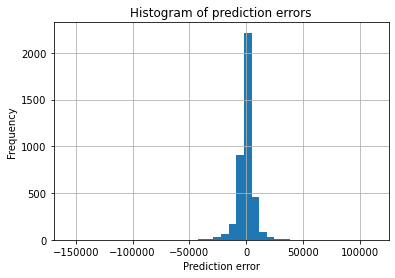

In [12]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [13]:
# fig, ax = plt.subplots()
# ax.scatter(y_test, y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# #regression line
# y_test, y_predicted = y_test.reshape(-1,1), y_pred.reshape(-1,1)
# ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

# plt.show()

<h3>Ridge Regression</h3>

In [21]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = Ridge(alpha=0.05)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
rmse_rf_test = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_rf_train)
print(rmse_rf_test)

R2 score 0.9746113764720951
MAE 4574.75353588762
0.0
8116.047181517478


In [15]:
np.exp(0.12338298831459489)

1.13131761941555

Text(0, 0.5, 'Frequency')

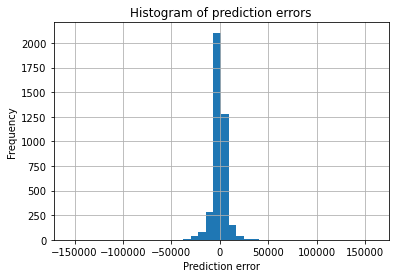

In [16]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>Lasso Regression</h3>

In [17]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9750798920690823
MAE 4548.6821444409225


In [18]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

ValueError: Unable to coerce to Series, length must be 1: given 4003

<h3>KNeighbours Regression</h3>

In [22]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9661715041282269
MAE 4944.2380381380635


Text(0, 0.5, 'Frequency')

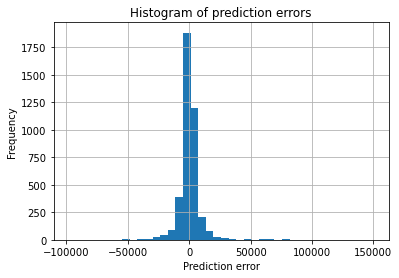

In [23]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>DecisionTree Regression</h3>

In [24]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9692644016688751
MAE 5013.481357872282


In [25]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

ValueError: Unable to coerce to Series, length must be 1: given 4003

<h3>Support Vector Regression</h3>

In [26]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=100,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

KeyboardInterrupt: 

In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>Random Forest Regression</h3>

In [ ]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=350,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                                )

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
# diff = y_test - y_pred
# diff.hist(bins = 40)
# plt.title('Histogram of prediction errors')
# plt.xlabel('Prediction error')
# plt.ylabel('Frequency')


<h3>Adaboost Regression</h3>

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

#adjust
step2 = AdaBoostRegressor(n_estimators=55, learning_rate=0.01)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>Gradient Boosting Regression</h3>

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=5000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>XGB Regression</h3>

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [ ]:
import catboost as cb
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

step2 = cb.CatBoostRegressor(iterations= 150,
        learning_rate = 0.03,
        depth = 6,
        l2_leaf_reg = 0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

<h3>Stacking Regression</h3>

In [27]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=5000,max_features=0.5)),
    ('knn',KNeighborsRegressor(n_neighbors=3))

]
#     ('xgb', XGBRegressor(n_estimators=50,learning_rate=0.5,max_depth=10))
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9764294195959392
MAE 4366.649331625446


In [ ]:
diff = y_test - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')

In [ ]:
query = np.array(["Apple","iPhone 13",32.0, 2.0,"iOS",4.7,0,0,0,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(np.exp(ans),2)
print("The predicted price for given configuration is: ", ans, "LKR")


In [ ]:
query = np.array(["Apple","iPhone X",64.0, 3.0,"iOS",5.8,0,0,0,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(np.exp(ans),2)
print("The predicted price for given configuration is: ",ans)


In [ ]:
query = np.array(["Apple","iPhone 8",64.0, 2.0,"iOS",4.7,0,0,0,0])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(np.exp(ans),2)
print("The predicted price for given configuration is: ",ans)
ans = ans*54.6/5.2
print("Inflation adjusted price: ", ans)
print("Depreciated price: ", ans*89/100)


In [ ]:
# import pickle
# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
query = np.array(["Samsung","Galaxy S21",256.0, 8.0,"Android",6.2,0,1,1,1])

query = query.reshape(1, 10)
print(query[0])
ans=pipe.predict(query)[0]
ans = round(np.exp(ans),2)
print("The predicted price for given configuration is: ",ans)
ans = ans*60.6/5.2
print("Inflation adjusted price: ", ans)
print("Depreciated price: ", ans*89/100)
